In [1]:
import pandas as pd
import compare_outcomes as co
from plotnine import *

In [2]:
actual_2024 = co.prep_bts('2024-01-28', '2024-01-28', '../db/truth/T_ONTIME_REPORTING_2024.csv')
actual_2024.reset_index(names='id', inplace=True)

/Users/michael/code/umich/lattice/recovair-abm/validation/compare_outcomes.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [3]:
def prep_intro_comp(actual: pd.DataFrame, csv_location: str):
    sim = pd.read_csv(csv_location)
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp = co.OutcomeComparison(actual, sim)
    print(f'-- intro to {csv_location} --')
    print('otp', comp.compare_otp())
    print('delay', comp.compare_total_delay())
    print('cancel', comp.compare_num_cancellations())
    print('flight hours', comp.compare_total_hours_flown())
    return comp

In [26]:
comp2024 = prep_intro_comp(actual_2024, '../results-2024-01-28-flights.csv')
comp2024_nodisrupt = prep_intro_comp(actual_2024, '../results-2024-01-28-nodisrupt-flights.csv')
comp2024_dfs = prep_intro_comp(actual_2024, '../results-2024-01-28-dfs-flights.csv')
comp2024_dfs_nodisrupt = prep_intro_comp(actual_2024, '../results-2024-01-28-dfs-nodisrupt-flights.csv')

-- intro to ../results-2024-01-28-flights.csv --
otp {'actual': 0.8657701091093631, 'sim': 0.751839634610505}
delay {'actual': 21528.0, 'sim': 49394.0}
cancel {'actual': 0.0, 'sim': 22}
flight hours {'actual': 8028.033333333334, 'sim': 8532.340277777777}
-- intro to ../results-2024-01-28-nodisrupt-flights.csv --
otp {'actual': 0.8657701091093631, 'sim': 0.9852829231159604}
delay {'actual': 21528.0, 'sim': 2395.0}
cancel {'actual': 0.0, 'sim': 1}
flight hours {'actual': 8028.033333333334, 'sim': 8563.833333333334}
-- intro to ../results-2024-01-28-dfs-flights.csv --
otp {'actual': 0.8657701091093631, 'sim': 0.748540979446841}
delay {'actual': 21528.0, 'sim': 57702.0}
cancel {'actual': 0.0, 'sim': 50}
flight hours {'actual': 8028.033333333334, 'sim': 8467.486388888889}
-- intro to ../results-2024-01-28-dfs-nodisrupt-flights.csv --
otp {'actual': 0.8657701091093631, 'sim': 0.9799543263131185}
delay {'actual': 21528.0, 'sim': 3525.0}
cancel {'actual': 0.0, 'sim': 23}
flight hours {'actual'

In [5]:
actual_2022 = co.prep_bts('2022-12-22', '2022-12-22', '../db/truth/T_ONTIME_REPORTING_2022.csv')
actual_2022.reset_index(names='id', inplace=True)

/Users/michael/code/umich/lattice/recovair-abm/validation/compare_outcomes.py:16: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
/Users/michael/code/umich/lattice/recovair-abm/validation/compare_outcomes.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [27]:
comp2022 = prep_intro_comp(actual_2022, '../results-2022-12-22-flights.csv')
comp2022_nodisrupt = prep_intro_comp(actual_2022, '../results-2022-12-22-nodisrupt-flights.csv')
comp2022_dfs = prep_intro_comp(actual_2022, '../results-2022-12-22-dfs-flights.csv')
comp2022_dfs_nodisrupt = prep_intro_comp(actual_2022, '../results-2022-12-22-dfs-nodisrupt-flights.csv')

-- intro to ../results-2022-12-22-flights.csv --
otp {'actual': 0.28586013272077593, 'sim': 0.22664624808575803}
delay {'actual': 154511.0, 'sim': 174415.0}
cancel {'actual': 1026.0, 'sim': 1378}
flight hours {'actual': 5942.416666666667, 'sim': 5434.304166666667}
-- intro to ../results-2022-12-22-nodisrupt-flights.csv --
otp {'actual': 0.28586013272077593, 'sim': 0.9226646248085758}
delay {'actual': 154511.0, 'sim': 21665.0}
cancel {'actual': 1026.0, 'sim': 8}
flight hours {'actual': 5942.416666666667, 'sim': 8277.5}
-- intro to ../results-2022-12-22-dfs-flights.csv --
otp {'actual': 0.28586013272077593, 'sim': 0.30627871362940273}
delay {'actual': 154511.0, 'sim': 146703.0}
cancel {'actual': 1026.0, 'sim': 1326}
flight hours {'actual': 5942.416666666667, 'sim': 5443.066666666667}
-- intro to ../results-2022-12-22-dfs-nodisrupt-flights.csv --
otp {'actual': 0.28586013272077593, 'sim': 0.7679938744257274}
delay {'actual': 154511.0, 'sim': 13555.0}
cancel {'actual': 1026.0, 'sim': 802}


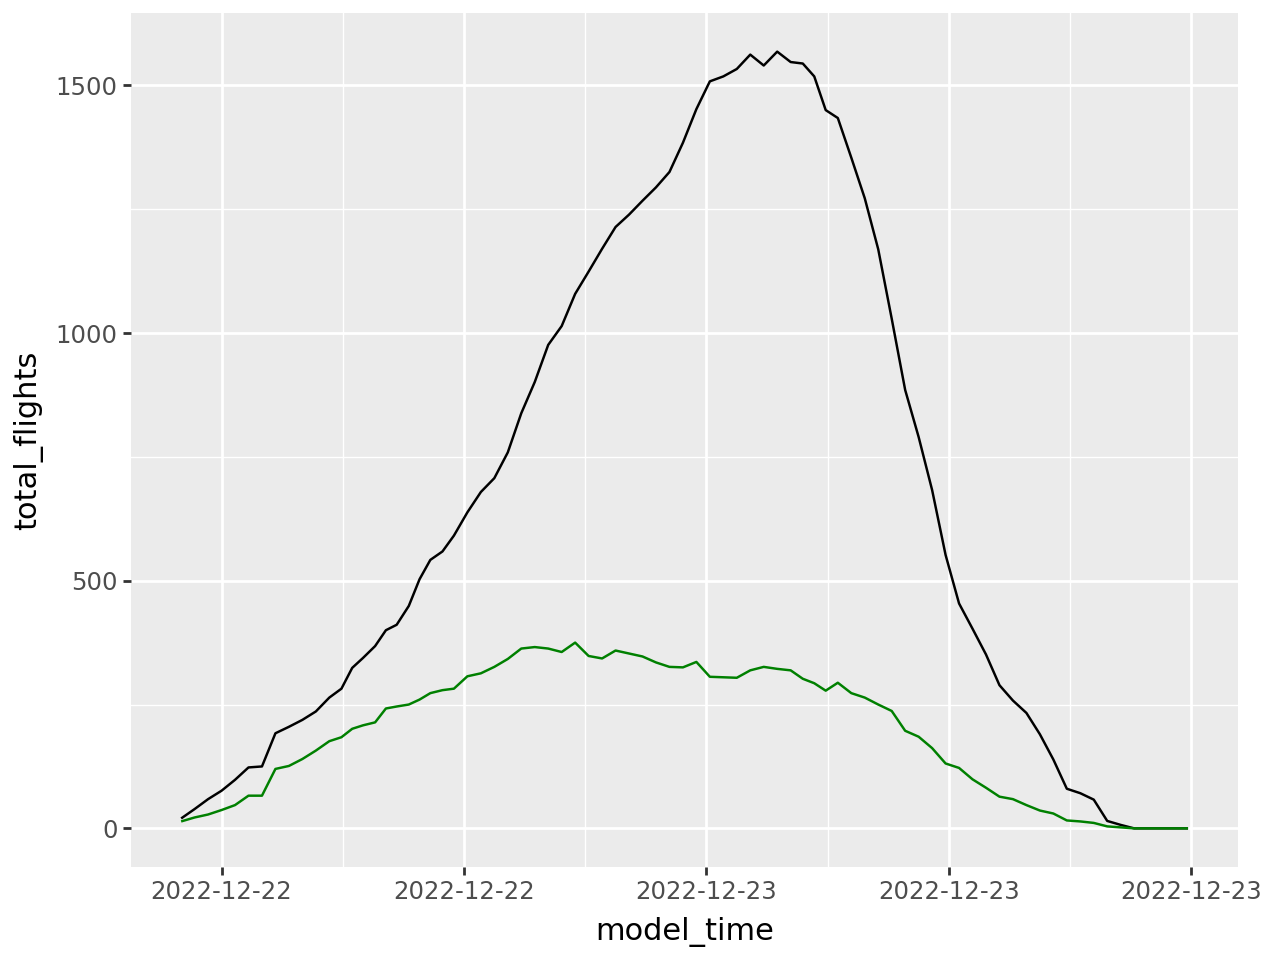

In [9]:
dfs_stats = pd.read_csv('../test_log_12-22-aircraftdfs-dfs-stats.csv')
dfs_stats['model_time'] = pd.to_datetime(dfs_stats['model_time'])
from plotnine import *
ggplot(dfs_stats) + geom_line(aes(x='model_time', y='total_flights')) + geom_line(aes(x='model_time', y='flights_reserved'), color='green')

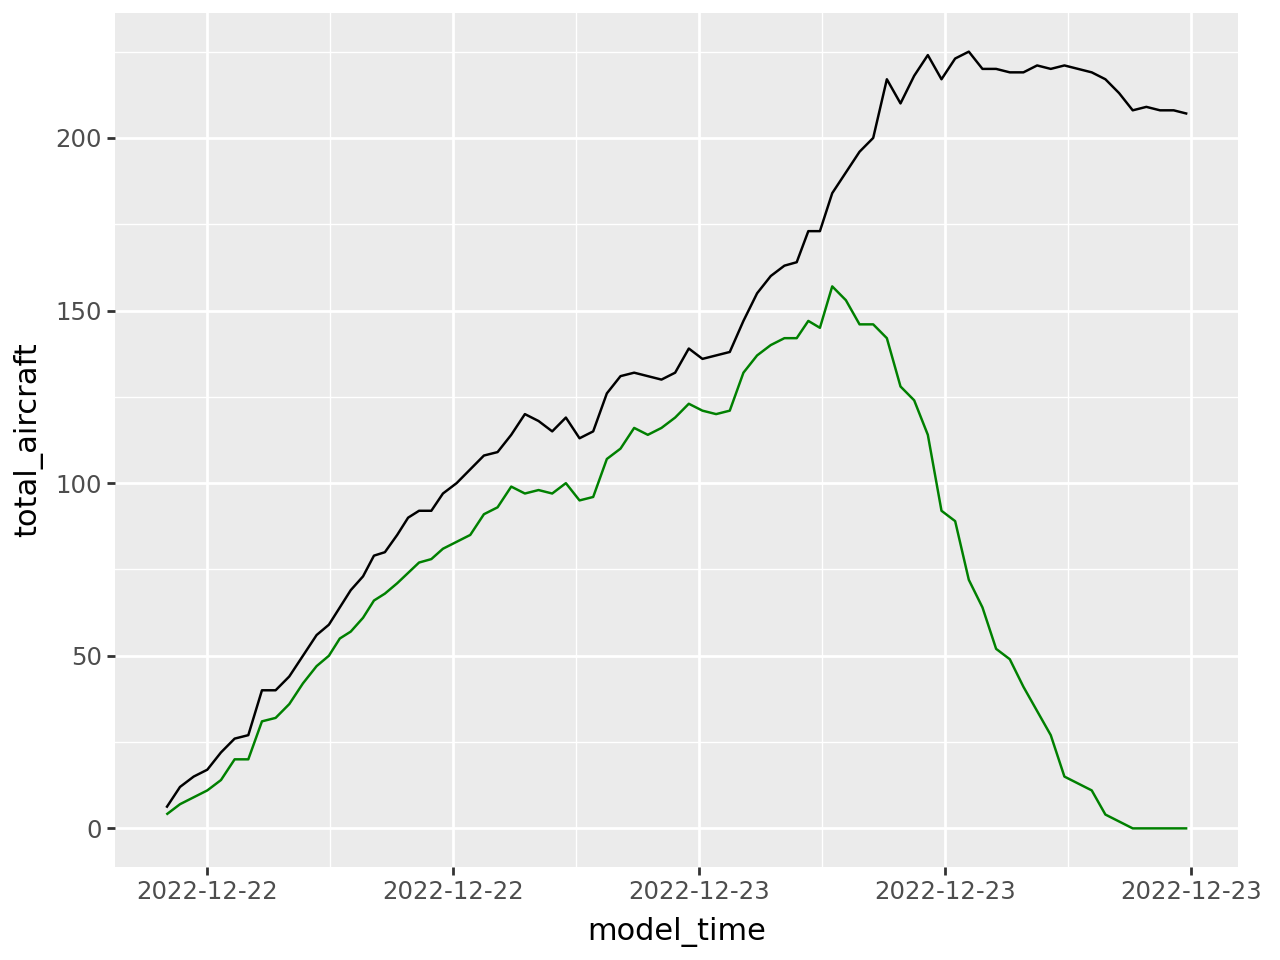

In [93]:

ggplot(dfs_stats) + geom_line(aes(x='model_time', y='total_aircraft')) + geom_line(aes(x='model_time', y='aircraft_with_string'), color='green')

In [61]:
delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2024-01-28_{delay_tolerance}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2024.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_df

delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2024-01-28-aircraftdfs_{delay_tolerance}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2024.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_dfs_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_dfs_df

10 otp {'actual': 0.8657701091093631, 'sim': 0.8617102258310073}
10 delay {'actual': 21528.0, 'sim': 3962.0}
10 cancel {'actual': 0.0, 'sim': 542}
30 otp {'actual': 0.8657701091093631, 'sim': 0.8312611012433393}
30 delay {'actual': 21528.0, 'sim': 15192.0}
30 cancel {'actual': 0.0, 'sim': 249}
60 otp {'actual': 0.8657701091093631, 'sim': 0.7929459528038569}
60 delay {'actual': 21528.0, 'sim': 26649.0}
60 cancel {'actual': 0.0, 'sim': 114}
120 otp {'actual': 0.8657701091093631, 'sim': 0.7657954833798528}
120 delay {'actual': 21528.0, 'sim': 40302.0}
120 cancel {'actual': 0.0, 'sim': 44}
180 otp {'actual': 0.8657701091093631, 'sim': 0.7574219741182441}
180 delay {'actual': 21528.0, 'sim': 45411.0}
180 cancel {'actual': 0.0, 'sim': 33}
240 otp {'actual': 0.8657701091093631, 'sim': 0.7576757168231414}
240 delay {'actual': 21528.0, 'sim': 46009.0}
240 cancel {'actual': 0.0, 'sim': 29}
300 otp {'actual': 0.8657701091093631, 'sim': 0.7500634356762244}
300 delay {'actual': 21528.0, 'sim': 4820

,delay_tolerance,otp,delay,cancel
0,10,0.787871,2209.0,833
1,30,0.838873,11198.0,375
2,60,0.806902,20706.0,224
3,120,0.772900,36658.0,108
4,180,0.753362,44832.0,87
5,240,0.751332,49830.0,71
6,300,0.758437,54732.0,49
7,360,0.748541,58197.0,50


In [67]:
delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2022-12-22_{delay_tolerance}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2022.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_df

delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2022-12-22-aircraftdfs_{delay_tolerance}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2022.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_dfs_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_dfs_df

10 otp {'actual': 0.28586013272077593, 'sim': 0.5959673302705462}
10 delay {'actual': 154511.0, 'sim': 3225.0}
10 cancel {'actual': 1026.0, 'sim': 1583}
30 otp {'actual': 0.28586013272077593, 'sim': 0.4882593159775396}
30 delay {'actual': 154511.0, 'sim': 17054.0}
30 cancel {'actual': 1026.0, 'sim': 1480}
60 otp {'actual': 0.28586013272077593, 'sim': 0.3432873915262889}
60 delay {'actual': 154511.0, 'sim': 39858.0}
60 cancel {'actual': 1026.0, 'sim': 1501}
120 otp {'actual': 0.28586013272077593, 'sim': 0.2549770290964778}
120 delay {'actual': 154511.0, 'sim': 84442.0}
120 cancel {'actual': 1026.0, 'sim': 1438}
180 otp {'actual': 0.28586013272077593, 'sim': 0.2473200612557427}
180 delay {'actual': 154511.0, 'sim': 115155.0}
180 cancel {'actual': 1026.0, 'sim': 1412}
240 otp {'actual': 0.28586013272077593, 'sim': 0.24017355793772333}
240 delay {'actual': 154511.0, 'sim': 139334.0}
240 cancel {'actual': 1026.0, 'sim': 1396}
300 otp {'actual': 0.28586013272077593, 'sim': 0.2371107708014293

,delay_tolerance,otp,delay,cancel
0,10,0.525268,2252.0,1860
1,30,0.481368,11215.0,1699
2,60,0.407606,26932.0,1602
3,120,0.335886,60738.0,1474
4,180,0.311894,91649.0,1406
5,240,0.307044,113047.0,1386
6,300,0.305768,125022.0,1355
7,360,0.307810,142084.0,1330


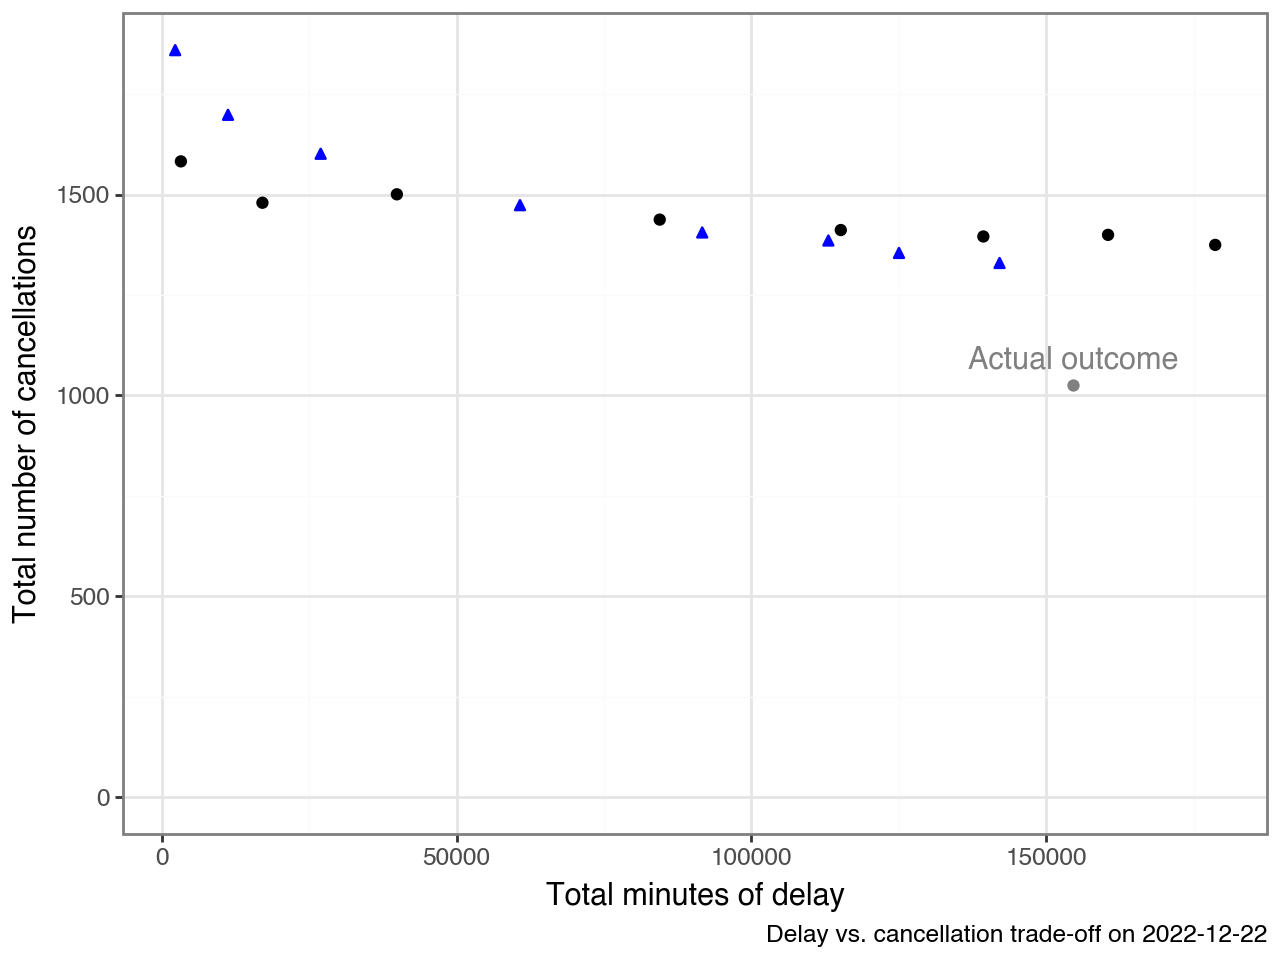

In [69]:
co.pn.ggplot(delay_cancel_df)\
+ co.pn.geom_point(data=delay_cancel_dfs_df, mapping=co.pn.aes(x='delay', y='cancel'), shape='^', color='blue')\
    + co.pn.geom_point(co.pn.aes(x='delay', y='cancel'))\
    + co.pn.annotate(geom='point', x=comp2022.compare_total_delay()['actual'], y=comp2022.compare_num_cancellations()['actual'], color='gray')\
    + co.pn.annotate(geom='text', x=comp2022.compare_total_delay()['actual'], y=comp2022.compare_num_cancellations()['actual']+60, label='Actual outcome', color='gray')\
    + co.pn.ylim(0, max(delay_cancel_df['cancel'].max(), delay_cancel_dfs_df['cancel'].max()))\
    + co.pn.labs(x='Total minutes of delay', y='Total number of cancellations', caption='Delay vs. cancellation trade-off on 2022-12-22', colour='Max delay per flight')\
    + co.pn.theme_bw()

In [70]:
ggsave(_, f'plots/2022-tradeoff.pdf', width=4, height=4)


/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 4 x 4 in image.
/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots/2022-tradeoff.pdf


In [65]:
comp2024.actual.query('ORIGIN == "DAL"').sort_values('ActualDepTimeUTC').iloc[-15:]

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration,arr_time,dep_time
3831,494966,2024-01-28,WN,N950WN,2100,DAL,COS,2155,2144.0,-11.0,...,2024-01-28 21:55:00-08:00,2024-01-28,21,2024-01-29 03:44:00+00:00,2024-01-29 05:34:00+00:00,3,5,0 days 01:50:00,2024-01-29 05:34:00+00:00,2024-01-29 03:44:00+00:00
1669,492804,2024-01-28,WN,N8314L,4450,DAL,LAX,2110,2145.0,35.0,...,2024-01-28 22:35:00-08:00,2024-01-28,22,2024-01-29 03:45:00+00:00,2024-01-29 07:01:00+00:00,3,7,0 days 03:16:00,2024-01-29 07:01:00+00:00,2024-01-29 03:45:00+00:00
1960,493095,2024-01-28,WN,N8551Q,2488,DAL,BHM,2155,2148.0,-7.0,...,2024-01-28 21:25:00-08:00,2024-01-28,21,2024-01-29 03:48:00+00:00,2024-01-29 05:15:00+00:00,3,5,0 days 01:27:00,2024-01-29 05:15:00+00:00,2024-01-29 03:48:00+00:00
168,491303,2024-01-28,WN,N223WN,1593,DAL,MAF,2145,2150.0,5.0,...,2024-01-28 21:00:00-08:00,2024-01-28,21,2024-01-29 03:50:00+00:00,2024-01-29 05:00:00+00:00,3,5,0 days 01:10:00,2024-01-29 05:00:00+00:00,2024-01-29 03:50:00+00:00
1207,492342,2024-01-28,WN,N7739A,2587,DAL,ABQ,2155,2155.0,0.0,...,2024-01-28 21:45:00-08:00,2024-01-28,21,2024-01-29 03:55:00+00:00,2024-01-29 05:35:00+00:00,3,5,0 days 01:40:00,2024-01-29 05:35:00+00:00,2024-01-29 03:55:00+00:00
1071,492206,2024-01-28,WN,N566WN,685,DAL,MCI,2110,2211.0,61.0,...,2024-01-28 20:35:00-08:00,2024-01-28,20,2024-01-29 04:11:00+00:00,2024-01-29 05:32:00+00:00,4,5,0 days 01:21:00,2024-01-29 05:32:00+00:00,2024-01-29 04:11:00+00:00
948,492083,2024-01-28,WN,N488WN,3903,DAL,AMA,2220,2220.0,0.0,...,2024-01-28 21:35:00-08:00,2024-01-28,21,2024-01-29 04:20:00+00:00,2024-01-29 05:24:00+00:00,4,5,0 days 01:04:00,2024-01-29 05:24:00+00:00,2024-01-29 04:20:00+00:00
2153,493288,2024-01-28,WN,N8610A,63,DAL,HOU,2220,2227.0,7.0,...,2024-01-28 21:25:00-08:00,2024-01-28,21,2024-01-29 04:27:00+00:00,2024-01-29 05:24:00+00:00,4,5,0 days 00:57:00,2024-01-29 05:24:00+00:00,2024-01-29 04:27:00+00:00
2663,493798,2024-01-28,WN,N8724J,1359,DAL,SLC,2220,2232.0,12.0,...,2024-01-28 23:10:00-08:00,2024-01-28,23,2024-01-29 04:32:00+00:00,2024-01-29 07:18:00+00:00,4,7,0 days 02:46:00,2024-01-29 07:18:00+00:00,2024-01-29 04:32:00+00:00
2432,493567,2024-01-28,WN,N8668A,4255,DAL,DEN,2235,2234.0,-1.0,...,2024-01-28 22:35:00-08:00,2024-01-28,22,2024-01-29 04:34:00+00:00,2024-01-29 06:28:00+00:00,4,6,0 days 01:54:00,2024-01-29 06:28:00+00:00,2024-01-29 04:34:00+00:00


In [75]:
(comp2024_dfs.merged['tail'] == comp2024_dfs.merged['TAIL_NUM']).mean()

0.608982491753362

In [85]:
comp2024.actual.query('TAIL_NUM == "N945WN"').sort_values('ActualDepTimeUTC')

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration,arr_time,dep_time
3812,494947,2024-01-28,WN,N945WN,3742,SYR,BWI,600,559.0,-1.0,...,2024-01-28 04:40:00-08:00,2024-01-28,4,2024-01-28 10:59:00+00:00,2024-01-28 12:12:00+00:00,10,12,0 days 01:13:00,2024-01-28 12:12:00+00:00,2024-01-28 10:59:00+00:00
3807,494942,2024-01-28,WN,N945WN,2229,BWI,STL,845,840.0,-5.0,...,2024-01-28 08:15:00-08:00,2024-01-28,8,2024-01-28 13:40:00+00:00,2024-01-28 15:37:00+00:00,13,15,0 days 01:57:00,2024-01-28 15:37:00+00:00,2024-01-28 13:40:00+00:00
3810,494945,2024-01-28,WN,N945WN,2229,STL,OMA,1050,1042.0,-8.0,...,2024-01-28 10:10:00-08:00,2024-01-28,10,2024-01-28 16:42:00+00:00,2024-01-28 17:53:00+00:00,16,17,0 days 01:11:00,2024-01-28 17:53:00+00:00,2024-01-28 16:42:00+00:00
3809,494944,2024-01-28,WN,N945WN,2229,OMA,DCA,1245,1239.0,-6.0,...,2024-01-28 13:05:00-08:00,2024-01-28,13,2024-01-28 18:39:00+00:00,2024-01-28 21:03:00+00:00,18,21,0 days 02:24:00,2024-01-28 21:03:00+00:00,2024-01-28 18:39:00+00:00
3808,494943,2024-01-28,WN,N945WN,2229,DCA,FLL,1640,1642.0,2.0,...,2024-01-28 16:20:00-08:00,2024-01-28,16,2024-01-28 21:42:00+00:00,2024-01-29 00:51:00+00:00,21,0,0 days 03:09:00,2024-01-29 00:51:00+00:00,2024-01-28 21:42:00+00:00
3811,494946,2024-01-28,WN,N945WN,3672,FLL,DCA,2000,2037.0,37.0,...,2024-01-28 19:30:00-08:00,2024-01-28,19,2024-01-29 01:37:00+00:00,2024-01-29 03:54:00+00:00,1,3,0 days 02:17:00,2024-01-29 03:54:00+00:00,2024-01-29 01:37:00+00:00


In [90]:
(comp2024.actual['DEP_DELAY'] < 0).mean()

0.526516112661761

In [101]:
comp2024.simulated.set_index('id').loc[[494621, 494619, 494620]]

,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
id,,,,,,,,,,,,,,
494621,3514,N211WN,1272.0,128,BNA,BDL,0,2024-01-28 21:45:00+00:00,2024-01-29 00:00:00+00:00,2024-01-28 18:55:00+00:00,2024-01-28 21:10:00+00:00,170.0,170.0,0 days 02:15:00
494619,2192,N220WN,1065.0,81,BDL,BWI,0,2024-01-29 00:00:00+00:00,2024-01-29 01:20:00+00:00,2024-01-28 22:00:00+00:00,2024-01-28 23:20:00+00:00,120.0,120.0,0 days 01:20:00
494620,3389,N442WN,1067.0,0,BWI,SRQ,1,NaT,NaT,2024-01-29 00:25:00+00:00,2024-01-29 02:55:00+00:00,NaN,NaN,NaT


In [11]:
comp2024_dfs.actual.query('TAIL_NUM == "N7715E"').sort_values('DEP_TIME')

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration
1124,492259,2024-01-28,WN,N7715E,1764,DEN,PHX,1230,1231.0,1.0,...,2024-01-28,21,2024-01-28 13:30:00-08:00,2024-01-28,13,2024-01-28 19:31:00+00:00,2024-01-28 21:18:00+00:00,19,21,0 days 01:47:00
1126,492261,2024-01-28,WN,N7715E,2683,PHX,BUF,1100,1518.0,258.0,...,2024-01-28,22,2024-01-28 14:00:00-08:00,2024-01-28,14,2024-01-28 22:18:00+00:00,2024-01-29 02:23:00+00:00,22,2,0 days 04:05:00
1125,492260,2024-01-28,WN,N7715E,2683,BUF,FLL,1735,2157.0,262.0,...,2024-01-29,1,2024-01-28 17:40:00-08:00,2024-01-28,17,2024-01-29 02:57:00+00:00,2024-01-29 05:54:00+00:00,2,5,0 days 02:57:00


In [27]:
comp2022.actual.groupby('TAIL_NUM').agg({'CANCELLED': ['min', 'sum', 'count']})[('CANCELLED', 'min')]

TAIL_NUM
N1801U    0.0
N1802U    0.0
N1803U    0.0
N1804U    0.0
N1805U    0.0
         ... 
N965WN    0.0
N966WN    0.0
N967WN    0.0
N968WN    0.0
N969WN    0.0
Name: (CANCELLED, min), Length: 769, dtype: float64

In [13]:
comp2024_dfs_nodisrupt.simulated.query('tail == "N7715E"').sort_values('sched_dep')

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
3603,492261,2683,N7715E,1280.0,20,PHX,BUF,0,2024-01-28 18:00:00+00:00,2024-01-28 22:00:00+00:00,2024-01-28 18:00:00+00:00,2024-01-28 22:00:00+00:00,0.0,0.0,0 days 04:00:00
1606,492259,1764,N7715E,NaN,0,DEN,PHX,1,NaT,NaT,2024-01-28 19:30:00+00:00,2024-01-28 21:30:00+00:00,NaN,NaN,NaT
2529,492260,2683,N7715E,1096.0,0,BUF,FLL,0,2024-01-28 22:35:00+00:00,2024-01-29 01:40:00+00:00,2024-01-28 22:35:00+00:00,2024-01-29 01:40:00+00:00,0.0,0.0,0 days 03:05:00


In [82]:
comp2024_dfs.actual.query('id == 491694')[['ActualDepTimeUTC', 'ActualArrTimeUTC', 'DEP_DELAY', 'TAIL_NUM']]

,ActualDepTimeUTC,ActualArrTimeUTC,DEP_DELAY,TAIL_NUM
559,2024-01-28 10:56:00+00:00,2024-01-28 13:10:00+00:00,1.0,N405WN


<Axes: ylabel='Frequency'>

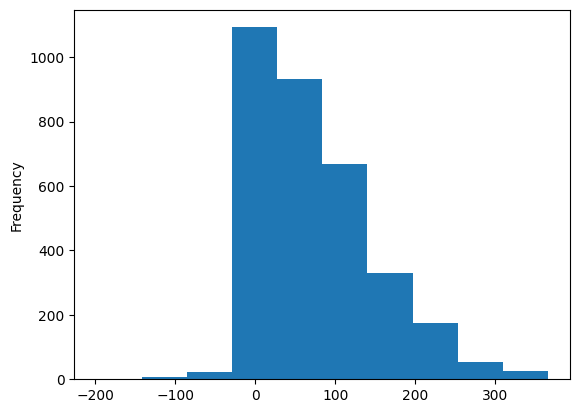

In [88]:
(comp2024_dfs.merged['DEP_DELAY_sim'] - comp2024_dfs.merged['DEP_DELAY_act']).plot.hist()

In [71]:
comp2024.actual.query('TAIL_NUM == "N909WN"').sort_values('ActualDepTimeUTC')

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration
3638,494773,2024-01-28,WN,N909WN,210,RIC,ATL,605,556.0,-9.0,...,2024-01-28,13,2024-01-28 05:05:00-08:00,2024-01-28,5,2024-01-28 10:56:00+00:00,2024-01-28 12:38:00+00:00,10,12,0 days 01:42:00
3637,494772,2024-01-28,WN,N909WN,210,ATL,OMA,850,909.0,19.0,...,2024-01-28,16,2024-01-28 08:20:00-08:00,2024-01-28,8,2024-01-28 14:09:00+00:00,2024-01-28 16:26:00+00:00,14,16,0 days 02:17:00
3633,494768,2024-01-28,WN,N909WN,1242,OMA,MDW,1055,1101.0,6.0,...,2024-01-28,18,2024-01-28 10:20:00-08:00,2024-01-28,10,2024-01-28 17:01:00+00:00,2024-01-28 18:24:00+00:00,17,18,0 days 01:23:00
3634,494769,2024-01-28,WN,N909WN,1528,MDW,DEN,1315,1315.0,0.0,...,2024-01-28,22,2024-01-28 14:00:00-08:00,2024-01-28,14,2024-01-28 19:15:00+00:00,2024-01-28 21:41:00+00:00,19,21,0 days 02:26:00
3639,494774,2024-01-28,WN,N909WN,3623,DEN,MDW,1545,1550.0,5.0,...,2024-01-29,1,2024-01-28 17:00:00-08:00,2024-01-28,17,2024-01-28 22:50:00+00:00,2024-01-29 01:10:00+00:00,22,1,0 days 02:20:00
3636,494771,2024-01-28,WN,N909WN,1901,MDW,RSW,1535,2000.0,265.0,...,2024-01-29,0,2024-01-28 16:20:00-08:00,2024-01-28,16,2024-01-29 02:00:00+00:00,2024-01-29 04:40:00+00:00,2,4,0 days 02:40:00
3635,494770,2024-01-28,WN,N909WN,1666,RSW,IND,1955,16.0,261.0,...,2024-01-29,3,2024-01-28 19:25:00-08:00,2024-01-28,19,2024-01-29 05:16:00+00:00,2024-01-29 07:45:00+00:00,5,7,0 days 02:29:00


In [70]:
comp2024.simulated.query('tail == "N909WN"').sort_values('dep_time')

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
2239,494773,210,N909WN,734.0,143,RIC,ATL,0,2024-01-28 17:00:00+00:00,2024-01-28 19:00:00+00:00,2024-01-28 11:05:00+00:00,2024-01-28 13:05:00+00:00,355.0,355.0,0 days 02:00:00
3349,493826,1747,N909WN,734.0,143,ATL,MDW,0,2024-01-28 20:37:00+00:00,2024-01-28 22:32:00+00:00,2024-01-28 20:00:00+00:00,2024-01-28 21:55:00+00:00,37.0,37.0,0 days 01:55:00
3777,494771,1901,N909WN,734.0,143,MDW,RSW,0,2024-01-29 00:30:00+00:00,2024-01-29 03:15:00+00:00,2024-01-28 21:35:00+00:00,2024-01-29 00:20:00+00:00,175.0,175.0,0 days 02:45:00


In [11]:
comp2024.actual.query('TAIL_NUM == "N241WN"').sort_values('ScheduledDepTimeUTC')[['ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
259,MDW,DCA,910,907.0,1155,1151.0,NaN,NaN,NaN,NaN,NaN
255,DCA,BNA,1135,1343.0,1240,1416.0,96.0,0.0,0.0,0.0,0.0
254,BNA,LGB,1325,1504.0,1615,1715.0,1.0,0.0,0.0,0.0,59.0
256,LGB,OAK,1700,1804.0,1815,1911.0,2.0,0.0,0.0,0.0,54.0
258,OAK,BUR,1900,1959.0,2010,2103.0,0.0,0.0,0.0,0.0,53.0
257,BUR,LAS,2050,2126.0,2200,2227.0,0.0,0.0,0.0,0.0,27.0


In [117]:
comp.merged.query('tail == "N1802U"').sort_values('ActualDepTimeUTC')[['id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ScheduledDepTimeUTC', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,id,origin,dest,TAIL_NUM,tail,ScheduledDepTimeUTC,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
7,491142,HNL,ITO,N1802U,N1802U,2024-01-28 16:10:00+00:00,2024-01-28 16:03:00+00:00,2024-01-28 20:00:00+00:00,2024-01-28 16:54:00+00:00,2024-01-28 21:00:00+00:00,-7.0,230.0
3,491138,ITO,HNL,N1802U,N1802U,2024-01-28 18:45:00+00:00,2024-01-28 18:37:00+00:00,2024-01-28 22:25:00+00:00,2024-01-28 19:31:00+00:00,2024-01-28 23:20:00+00:00,-8.0,220.0
2940,494075,HNL,KOA,N8787K,N1802U,2024-01-28 23:25:00+00:00,2024-01-28 23:22:00+00:00,2024-01-29 00:05:00+00:00,2024-01-29 00:09:00+00:00,2024-01-29 01:10:00+00:00,-3.0,40.0
2942,494077,KOA,HNL,N8787K,N1802U,2024-01-29 01:30:00+00:00,2024-01-29 01:25:00+00:00,2024-01-29 03:00:00+00:00,2024-01-29 02:14:00+00:00,2024-01-29 03:55:00+00:00,-5.0,90.0
2724,493859,HNL,SMF,N8736J,N1802U,2024-01-29 01:40:00+00:00,2024-01-29 01:39:00+00:00,NaT,2024-01-29 06:44:00+00:00,NaT,-1.0,NaN


In [95]:
comp2024.actual['dep_time'] = pd.to_datetime(comp2024.actual['ActualDepTimeUTC'])

In [110]:
dep_counts = comp2024.actual.groupby(['ORIGIN', pd.Grouper(key='dep_time', freq='1h')]).agg({'dep_time': ['count', 'max', 'min']}).reset_index()
dep_counts

ORIGIN                  dep_time                                  \
                                      count                       max   
0       ABQ 2024-01-28 12:00:00+00:00     2 2024-01-28 12:39:00+00:00   
1       ABQ 2024-01-28 13:00:00+00:00     3 2024-01-28 13:28:00+00:00   
2       ABQ 2024-01-28 14:00:00+00:00     3 2024-01-28 14:37:00+00:00   
3       ABQ 2024-01-28 16:00:00+00:00     1 2024-01-28 16:52:00+00:00   
4       ABQ 2024-01-28 17:00:00+00:00     3 2024-01-28 17:52:00+00:00   
...     ...                       ...   ...                       ...   
1182    TUS 2024-01-29 04:00:00+00:00     1 2024-01-29 04:12:00+00:00   
1183    VPS 2024-01-28 12:00:00+00:00     1 2024-01-28 12:48:00+00:00   
1184    VPS 2024-01-28 16:00:00+00:00     1 2024-01-28 16:23:00+00:00   
1185    VPS 2024-01-28 18:00:00+00:00     1 2024-01-28 18:37:00+00:00   
1186    VPS 2024-01-28 20:00:00+00:00     1 2024-01-28 20:35:00+00:00   

                                
                           min  
0    2024-01-28 12:29:00+00:00  
1    2024-01-28 13:05:00+00:00  
2    2024-01-28 14:00:00+00:00  
3    2024-01-28 16:52:00+00:00  
4    2024-01-28 17:23:00+00:00  
...                        ...  
1182 2024-01-29 04:12:00+00:00  
1183 2024-01-28 12:48:00+00:00  
1184 2024-01-28 16:23:00+00:00  
1185 2024-01-28 18:37:00+00:00  
1186 2024-01-28 20:35:00+00:00  

[1187 rows x 5 columns]

In [133]:
twodep = dep_counts[dep_counts['dep_time', 'count'] == 2].copy()
twodep['range'] = (twodep['dep_time', 'max'] - twodep['dep_time', 'min']).dt.total_seconds()/60
(twodep['range']<=10).mean()

0.28703703703703703

In [97]:
def compare_dep_throughput(comp: co.OutcomeComparison, airport: str):
    comp.actual['dep_time'] = comp.actual['ActualDepTimeUTC']
    sim_buckets = comp.simulated[(comp.simulated['origin'] == airport) & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = comp.actual[(comp.actual['ORIGIN'] == airport) & (comp.actual['CANCELLED'] == 0) & comp.actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['ORIGIN'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='dep_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='dep_time', y='ORIGIN'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of departures per hour', caption='Departures from ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours')

def compare_arr_throughput(comp: co.OutcomeComparison, airport: str):
    comp.actual['arr_time'] = comp.actual['ActualArrTimeUTC']
    sim_buckets = comp.simulated[(comp.simulated['dest'] == airport) & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = comp.actual[(comp.actual['DEST'] == airport) & (comp.actual['CANCELLED'] == 0) & comp.actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['ORIGIN'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='arr_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='arr_time', y='ORIGIN'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of arrivals per hour', caption='Arrivals to ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours')

In [8]:
def compare_dep_throughput_toggling_disruptions(actual: pd.DataFrame, simulated: pd.DataFrame, simulated_nodisrupt: pd.DataFrame, airport: str):
    actual['dep_time'] = actual['ActualDepTimeUTC']
    sim_buckets = simulated[(simulated['origin'] == airport) & (simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = actual[(actual['ORIGIN'] == airport) & (actual['CANCELLED'] == 0) & actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['ORIGIN'].count().reset_index()
    sim_nodisrupt_buckets = simulated_nodisrupt[(simulated_nodisrupt['origin'] == airport) & (simulated_nodisrupt['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='dep_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='dep_time', y='ORIGIN'), color='gray', linetype='dashed') + \
        co.pn.geom_line(sim_nodisrupt_buckets, co.pn.aes(x='dep_time', y='origin'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of departures per hour', caption='Departures from ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours', limits=[actual['ScheduledDepTimeUTC'].min(), actual['ScheduledDepTimeUTC'].max()])

def compare_arr_throughput_toggling_disruptions(actual: pd.DataFrame, simulated: pd.DataFrame, simulated_nodisrupt: pd.DataFrame, airport: str):
    actual['arr_time'] = actual['ActualArrTimeUTC']
    sim_buckets = simulated[(simulated['dest'] == airport) & (simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = actual[(actual['DEST'] == airport) & (actual['CANCELLED'] == 0) & actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['ORIGIN'].count().reset_index()
    sim_nodisrupt_buckets = simulated_nodisrupt[(simulated_nodisrupt['dest'] == airport) & (simulated_nodisrupt['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='arr_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='arr_time', y='ORIGIN'), color='gray', linetype='dashed') + \
        co.pn.geom_line(sim_nodisrupt_buckets, co.pn.aes(x='arr_time', y='origin'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of arrivals per hour', caption='Arrivals to ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours', limits=(actual['ScheduledArrTimeUTC'].min(), actual['ScheduledArrTimeUTC'].max()))

In [46]:
aircraft_endpoint_comp = pd.merge(pd.merge(
    comp.actual.sort_values('ScheduledArrTimeUTC', ascending=False).groupby('TAIL_NUM').head(1)[['TAIL_NUM', 'DEST']].rename(columns={'TAIL_NUM': 'tail', 'DEST': 'endpoint_scheduled'}),
    comp.actual[~comp.actual['ActualArrTimeUTC'].isna()].sort_values('ActualArrTimeUTC', ascending=False).groupby('TAIL_NUM').head(1)[['TAIL_NUM', 'DEST']].rename(columns={'TAIL_NUM': 'tail', 'DEST': 'endpoint_actual'}),
    on='tail', how='left'),
    comp.simulated[comp.simulated['CANCELLED'] == 0].sort_values('arr_time', ascending=False).groupby('tail').head(1)[['tail', 'dest']].rename(columns={'dest': 'endpoint_simulated'}),
    on='tail', how='left')

In [48]:
(aircraft_endpoint_comp['endpoint_scheduled'] == aircraft_endpoint_comp['endpoint_actual']).mean()

0.9986996098829649

In [ ]:
comp.simulated[(comp.simulated['dest'] == 'DEN') & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()

In [ ]:
comp2022.simulated.query('origin == "DEN" and CANCELLED == 0').sort_values('dep_time').head(20)

In [ ]:
comp2022.actual.query('ORIGIN == "DEN" and CANCELLED == 0').sort_values('ActualDepTimeUTC').head(25)[['id', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME', 'ActualDepTimeUTC']]

In [ ]:
comp2022.actual.query('CANCELLED == 0 and DIV1_AIRPORT.isna()')['ACTUAL_ELAPSED_TIME']

In [40]:
comp2022.actual['SCHEDULED_ELAPSED_TIME'] = (comp2022.actual['ScheduledArrTimeUTC'] - comp2022.actual['ScheduledDepTimeUTC']).dt.total_seconds() / 60

In [45]:
from matplotlib import pyplot as plt

In [53]:
((comp2022.actual['ACTUAL_ELAPSED_TIME'] - comp2022.actual['SCHEDULED_ELAPSED_TIME']) <= -10).mean()

0.222052067381317

In [105]:
comp2022.actual['Duration'] = comp2022.actual['ActualArrTimeUTC'] - comp2022.actual['ActualDepTimeUTC']
comp2022.actual['Duration'].dropna().sum().total_seconds()/3600

5942.416666666667

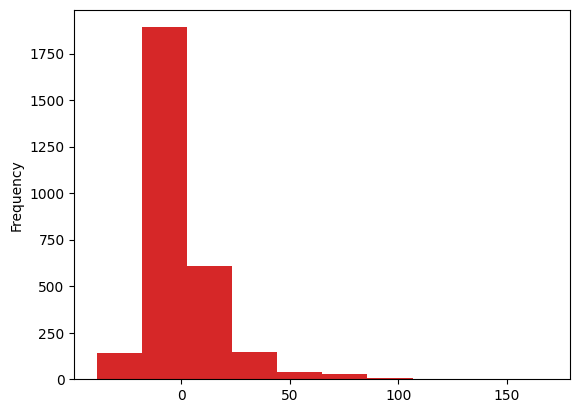

In [47]:
plt.hist((comp2022.actual['ACTUAL_ELAPSED_TIME'] - comp2022.actual['SCHEDULED_ELAPSED_TIME']))
plt.show()

In [22]:
comp2022.simulated.query('origin == "DEN"').CANCELLED.mean()

0.8208955223880597

/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 3 rows containing missing values.


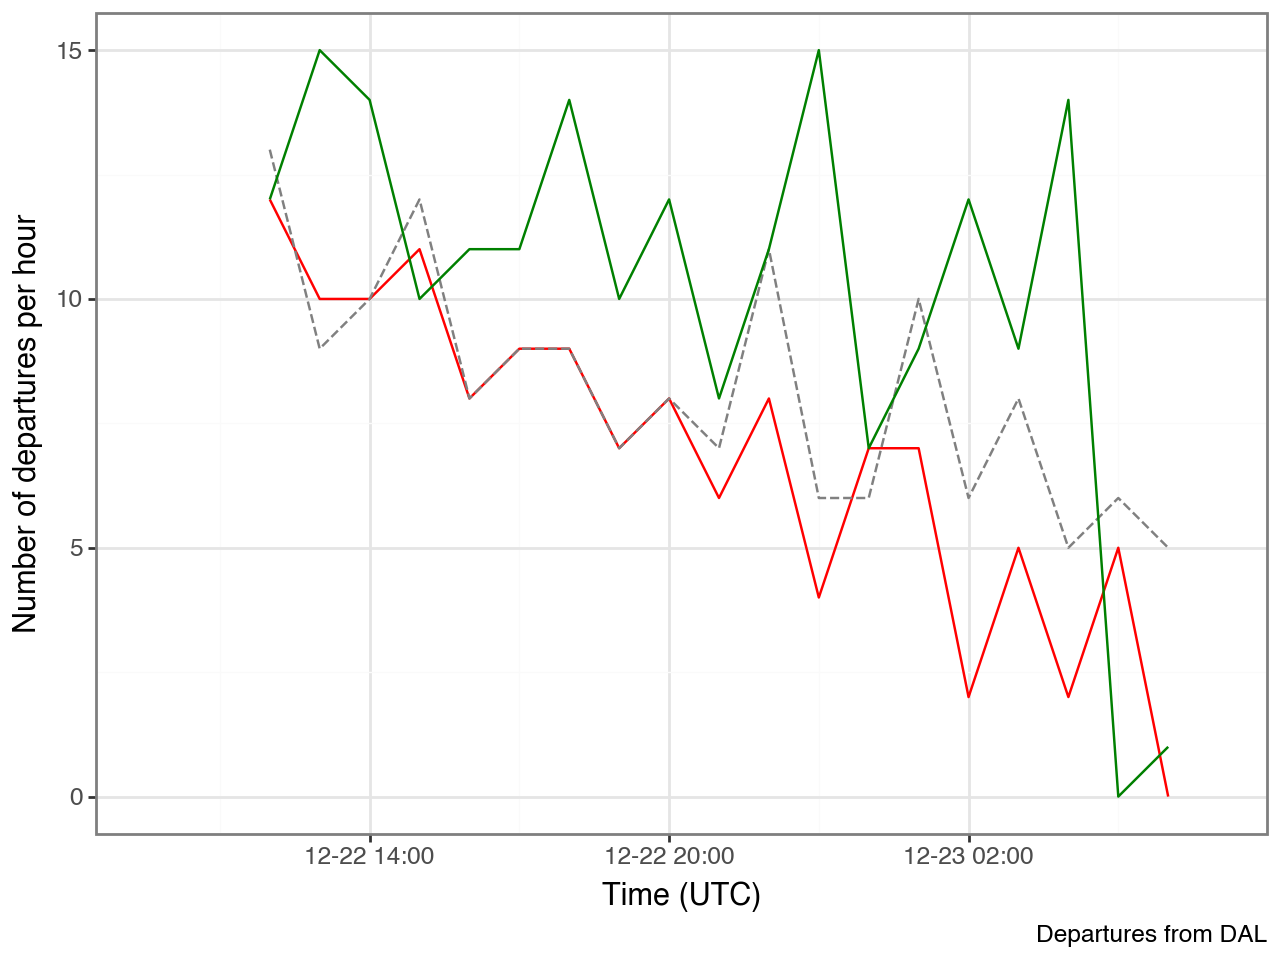

In [31]:
compare_dep_throughput_toggling_disruptions(comp2022.actual, comp2022.simulated, comp2022_nodisrupt.simulated, 'DAL')

In [72]:
for focus in ['DEN', 'HOU', 'MDW', 'MCO']:
    # co.pn.ggsave(compare_arr_throughput(comp, focus), f'plots/2022-nodisrupt-{focus}-arr-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_arr_throughput_toggling_disruptions(comp2022_dfs.actual, comp2022_dfs.simulated, comp2022_dfs_nodisrupt.simulated, focus), f'plots/2022-{focus}-dfs-arr-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_dep_throughput_toggling_disruptions(comp2022_dfs.actual, comp2022_dfs.simulated, comp2022_dfs_nodisrupt.simulated, focus), f'plots/2022-{focus}-dfs-dep-throughput.pdf', width=4, height=3)
# for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
#     co.pn.ggsave(compare_arr_throughput(comps_2024[0], focus), f'plots/2024-{focus}-arr-throughput.pdf', width=4, height=3)
# for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
#     co.pn.ggsave(compare_dep_throughput(comps_2022[0], focus), f'plots/2022-{focus}-dep-throughput.pdf', width=4, height=3)
for focus in ['DEN', 'HOU', 'MDW', 'MCO']:
    # co.pn.ggsave(compare_dep_throughput(comp, focus), f'plots/2022-nodisrupt-{focus}-dep-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_arr_throughput_toggling_disruptions(comp2024_dfs.actual, comp2024_dfs.simulated, comp2024_dfs_nodisrupt.simulated, focus), f'plots/2024-{focus}-dfs-arr-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_dep_throughput_toggling_disruptions(comp2024_dfs.actual, comp2024_dfs.simulated, comp2024_dfs_nodisrupt.simulated, focus), f'plots/2024-{focus}-dfs-dep-throughput.pdf', width=4, height=3)

/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 4 x 3 in image.
/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots/2022-DEN-dfs-arr-throughput.pdf
/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 5 rows containing missing values.
/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows

/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.


ActualDepTimeUTC
2022-12-22 13:00:00+00:00     1
2022-12-22 14:00:00+00:00     2
2022-12-22 15:00:00+00:00     7
2022-12-22 16:00:00+00:00    12
2022-12-22 17:00:00+00:00    13
2022-12-22 18:00:00+00:00    16
2022-12-22 19:00:00+00:00    17
2022-12-22 20:00:00+00:00    21
2022-12-22 21:00:00+00:00    23
2022-12-22 22:00:00+00:00    26
2022-12-22 23:00:00+00:00    30
2022-12-23 00:00:00+00:00    33
2022-12-23 01:00:00+00:00    36
2022-12-23 02:00:00+00:00    42
2022-12-23 03:00:00+00:00    47
2022-12-23 04:00:00+00:00    52
2022-12-23 05:00:00+00:00    56
2022-12-23 06:00:00+00:00    62
2022-12-23 07:00:00+00:00    63
2022-12-23 08:00:00+00:00    66
Freq: h, Name: id, dtype: int64

/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
/Users/michael/code/umich/lattice/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 4 rows containing missing values.


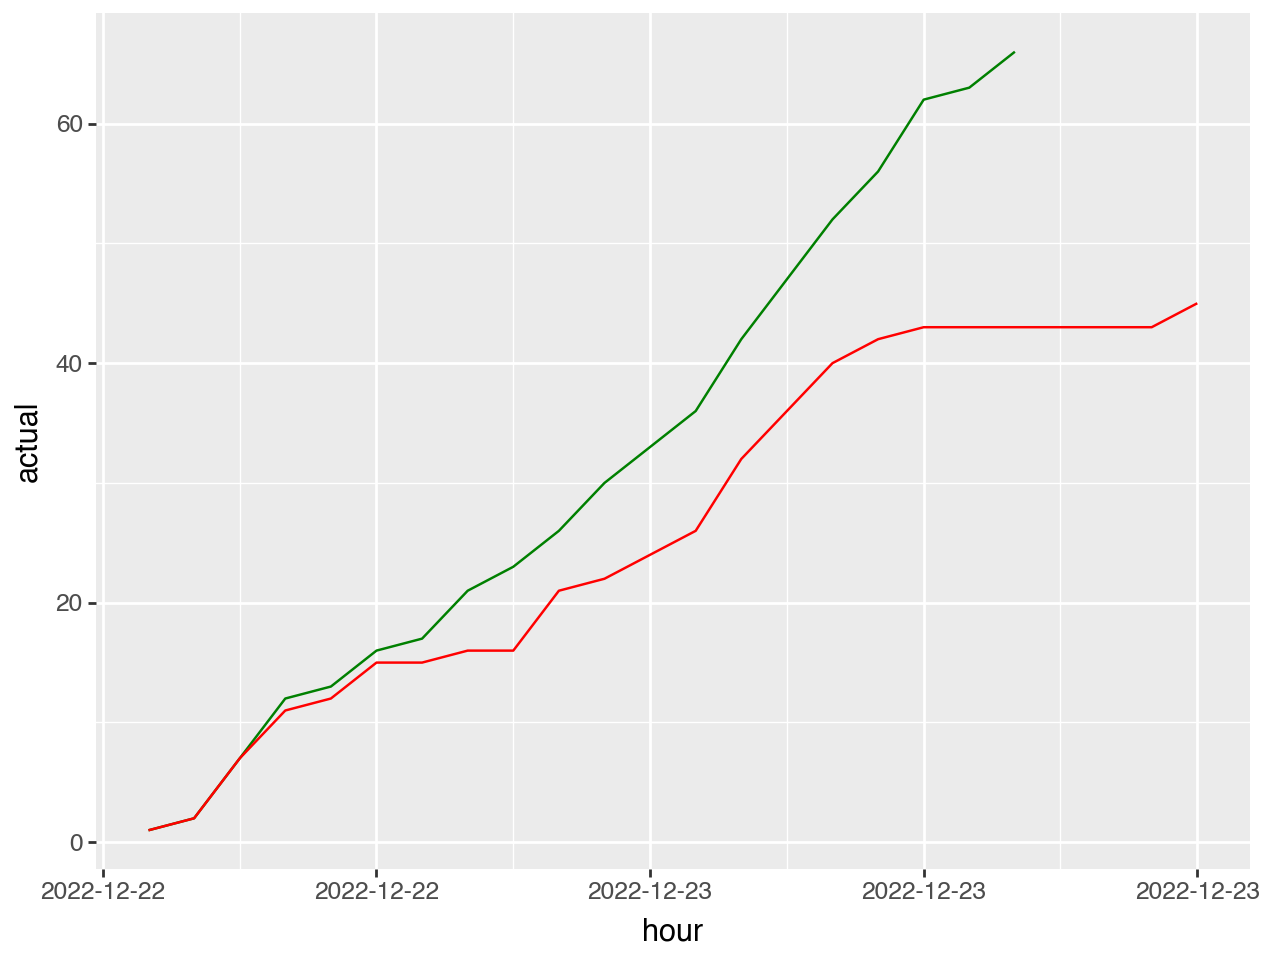

In [92]:
actual = comp2022.actual.query('ORIGIN == "DEN" and CANCELLED == 0').set_index('ActualDepTimeUTC').resample('1h')['id'].count().cumsum()
simulated = comp2022.simulated.query('origin == "DEN" and CANCELLED == 0').set_index('dep_time').resample('1h')['id'].count().cumsum()
simulated = comp2022_nodisrupt.simulated.query('origin == "DEN" and CANCELLED == 0').set_index('dep_time').resample('1h')['id'].count().cumsum()
df = pd.DataFrame({'actual': actual, 'simulated': simulated}).reset_index(names=['hour'])
ggplot(df) \
    + geom_line(aes(x='hour', y='actual'), color='green') \
    + geom_line(aes(x='hour', y='simulated'), color='red')